# MODELOS PREDICTIVOS: PREMEZ
En este notebook se pasará a limpio el código 'Modelo_RandomForest_premez' y parte del 'Modelo_SARIMAX_2' proporcionado por AIN

In [95]:
# # import de RF
# import pandas as pd
# import warnings
# import numpy as np
# import plotly.graph_objs as go
# import plotly.offline as pyo
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import plotly.graph_objects as go
# from sklearn.inspection import permutation_importance
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from plotly.subplots import make_subplots
# import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")

# from joblib import dump, load

## Modelo RANDOM FOREST

In [96]:
# # Especifica la ruta del archivo Excel
# archivo_excel_1 = r'C:/Users/a.sarrias/OneDrive - Tafalla Iron Foundry S.COOP/Documentos/datos/hastaMayo_M1.xlsx'
# archivo_excel_2 = r'C:/Users/a.sarrias/OneDrive - Tafalla Iron Foundry S.COOP/Documentos/datos/hastaMayo_M2.xlsx'

# # Carga los datos del archivo Excel en un DataFrame
# df_1 = pd.read_excel(archivo_excel_1)
# df_2 = pd.read_excel(archivo_excel_2)

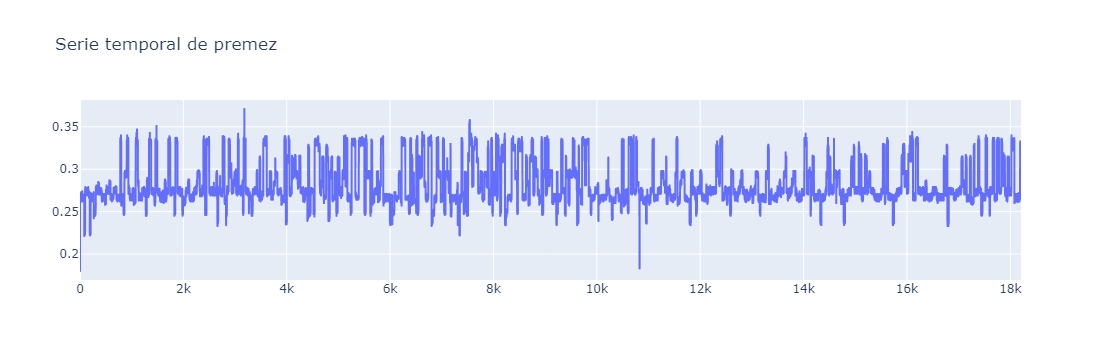

In [97]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=df_2.index,y=df_2.premez_norm,name='norm'))
fig.update_layout(title='Serie temporal de premez')

fig.show()
# df_1.set_index('fechaProduccion', inplace=True)

In [117]:
# Definir la variable objetivo y las características para entrenamiento y test
col_y = 'premez_norm'

# Definir las columnas de los conjuntos X
cols_x = [
    'inicioSemana', 'premez_norm_lag_1', 'premez_norm_lag_2', 'finos_norm_lag_1', 'finos_norm_lag_2',
    'humedadArenaAditivos_norm_lag_1', 'humedadArenaAditivos_norm_lag_2',  
    'tempAgua_norm_lag_1', 'tempAgua_norm_lag_2', 'tiempoVacio_norm_lag_1', 'tiempoVacio_norm_lag_2', 
    'compactabilidad_norm_lag_1', 'compactabilidad_norm_lag_2', 'cizalla_norm_lag_1', 'cizalla_norm_lag_2', 
    'humedadMezclaCalc_norm_lag_1', 'humedadMezclaCalc_norm_lag_2', 'bentonita_norm_lag_1','bentonita_norm_lag_2', 
    'tempMezclaCalc_norm_lag_1', 'tempMezclaCalc_norm_lag_2', 'tempArena_norm', 'tempArena_norm_lag_1', 'tempArena_norm_lag_2', 
    'agua_norm_lag_1', 'agua_norm_lag_2', 'tempArenaAditivos_norm_lag_1', 'tempArenaAditivos_norm_lag_2'  
]
X = df_2[cols_x]
y = df_2[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_2))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data = df_2.iloc[:indice_80_percent, :]
test_data = df_2.iloc[indice_80_percent:, :]

X_train = train_data[cols_x]
X_test = test_data[cols_x]
y_train = train_data[col_y]
y_test = test_data[col_y]

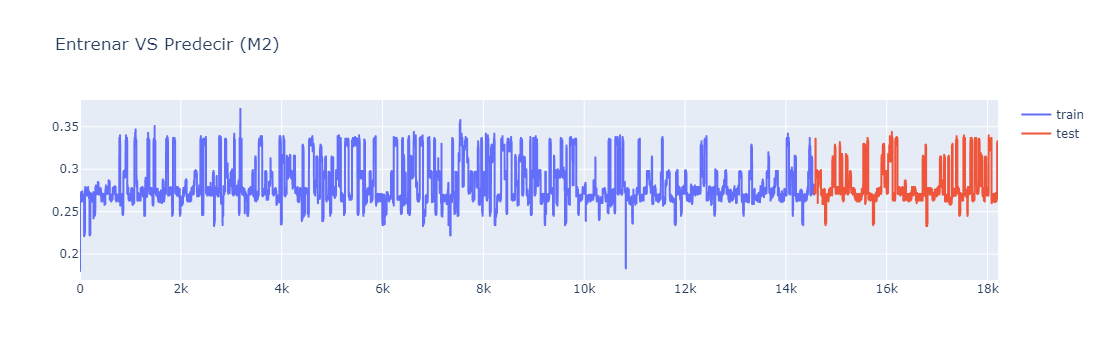

In [118]:
# aquí muestro con qué entrenamos al modelo y qué es lo que queremos predecir
fig = go.Figure()
fig.add_trace(go.Scattergl(x=X_train.index, y=y_train, mode='lines', name='train'))
fig.add_trace(go.Scattergl(x=X_test.index, y=y_test, mode='lines', name='test'))
fig.update_layout(title='Entrenar VS Predecir (M2)')

fig.show()

In [100]:
# # Definir el modelo RandomForestRegressor
# rf = RandomForestRegressor()

# # Definir los hiperparámetros a explorar en GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150, 300],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Crear un objeto GridSearchCV
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Ejecutar la búsqueda de hiperparámetros
# grid_search.fit(X_train, y_train)

# # Obtener los mejores hiperparámetros
# best_params = grid_search.best_params_
# print("Mejores hiperparámetros encontrados:")
# print(best_params)

Mejor set de parámetros: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [119]:
# modelo random forest
rf_premez1 = RandomForestRegressor(
    n_estimators=100, random_state=42, 
    max_depth=5, min_samples_split=2, n_jobs=-1)

rf_premez1.fit(X_train, y_train)
y_pred = rf_premez1.predict(X_test)

# analizamos los residuos
res_test = y_test - y_pred 

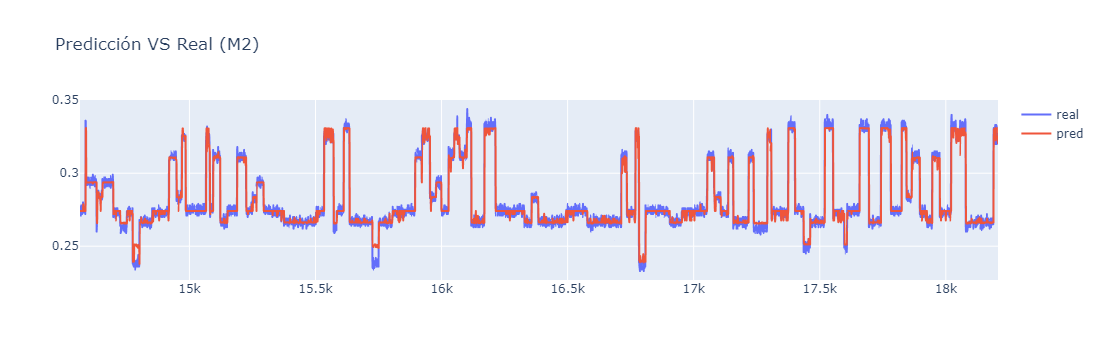

In [120]:
fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test.index, y=y_test, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test.index, y=y_pred, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real (M2)')

fig_pred1.show()

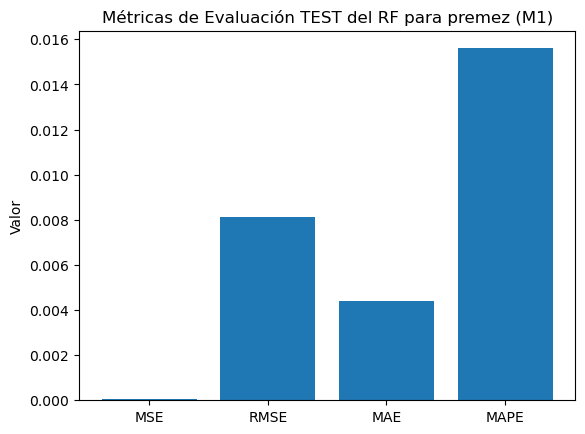

<Axes: >

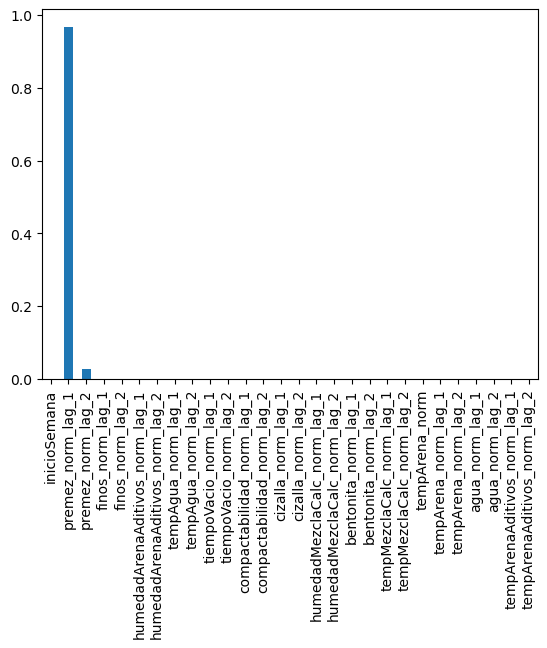

In [103]:
# Evaluación del modelo
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs(res_test / y_test)[~np.isinf(np.abs(res_test / y_test))])

metricas_test = {'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test, 'MAPE': mape_test}
plt.bar(metricas_test.keys(), metricas_test.values())
plt.title('Métricas de Evaluación TEST del RF para premez (M1)')
plt.ylabel('Valor')
plt.show()

# obtenemos la importancia de cada característica del modelo
importances = rf_premez1.feature_importances_

rf_imp = pd.Series(importances, index=cols_x)
rf_imp.plot.bar()

In [104]:
# quito lags de TODOS

# df_red = df_1.iloc[:,:36]
# df_red.info()

In [121]:
# cambiamos las características del modelo
# variable objetivo para entrenamiento y test
col_y = 'premez_norm'

X1 = df_2.drop(columns = ['premez_norm', 'codigoRef1', 'premez'])
y1 = df_2[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_2))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data = df_2.iloc[:indice_80_percent, :]
test_data = df_2.iloc[indice_80_percent:, :]

X_train1 = train_data.drop(columns = ['premez_norm', 'codigoRef1', 'premez'])
X_test1 = test_data.drop(columns = ['premez_norm', 'codigoRef1', 'premez'])
y_train1 = train_data[col_y]
y_test1 = test_data[col_y]

In [122]:
# modelo random forest con 3 variables características
rf_premez1 = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=10, min_samples_split=10, n_jobs=-1)

rf_premez1.fit(X_train1, y_train1)
y_pred1 = rf_premez1.predict(X_test1)

# analizamos los residuos
res_test1 = y_test1 - y_pred1 

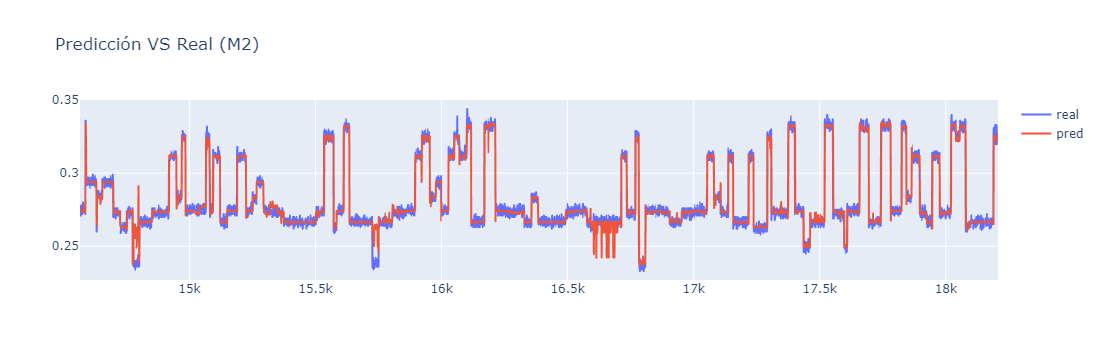

In [123]:
fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test1.index, y=y_test1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test1.index, y=y_pred1, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real (M2)')

fig_pred1.show()

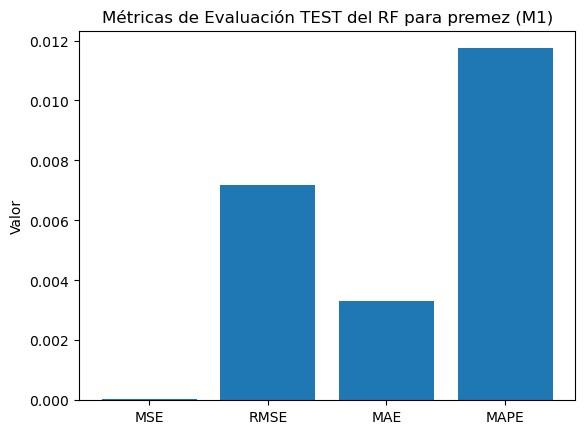

<Axes: >

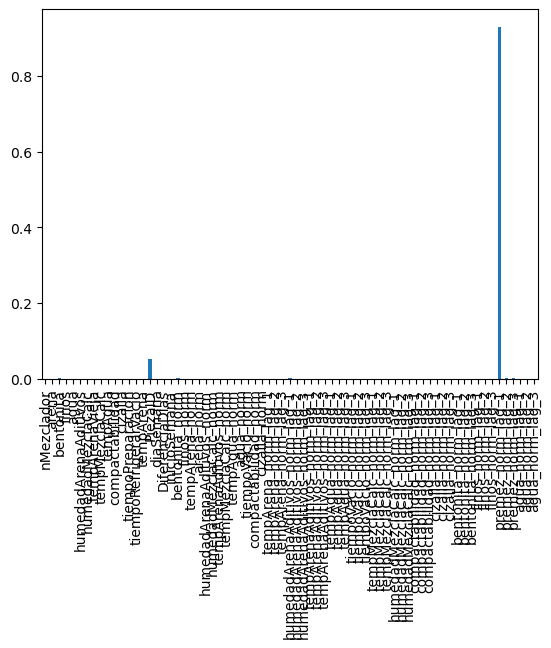

In [124]:
# Evaluación del modelo
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs(res_test / y_test)[~np.isinf(np.abs(res_test / y_test))])

metricas_test = {'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test, 'MAPE': mape_test}
plt.bar(metricas_test.keys(), metricas_test.values())
plt.title('Métricas de Evaluación TEST del RF para premez (M1)')
plt.ylabel('Valor')
plt.show()

# obtenemos la importancia de cada característica del modelo
importances = rf_premez1.feature_importances_

rf_imp = pd.Series(importances, index=X1.columns)
rf_imp.plot.bar()

In [125]:
# con lag 1 de compac y cizalla
cols_guardar = ['diaSemana', 'PiezaID', 'tiempoPreparacion','finos_norm' ]

X1 = df_2[cols_guardar]
y1 = df_2[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_2))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data_lag = df_2.iloc[:indice_80_percent, :]
test_data_lag = df_2.iloc[indice_80_percent:, :]

X_train_lag = train_data_lag[cols_guardar]
X_test_lag = test_data_lag[cols_guardar]
y_train_lag = train_data_lag[col_y]
y_test_lag = test_data_lag[col_y]

In [126]:
# con lag 1 de compac, cizalla y bentonita y quitando las otras 'irrelevantes'
# cols_guardar = ['diaSemana', 'PiezaID', 'tiempoPreparacion', 'premez_norm_lag_1', 
#                 'premez_norm_lag_2','finos_norm', 'bentonita_norm', 'tempAgua_norm']
cols_guardar = ['PiezaID', 'bentonita_norm' ]

X1 = df_2[cols_guardar]
y1 = df_2[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_2))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data_lag_2 = df_2.iloc[:indice_80_percent, :]
test_data_lag_2 = df_2.iloc[indice_80_percent:, :]

X_train_lag_2 = train_data_lag_2[cols_guardar]
X_test_lag_2 = test_data_lag_2[cols_guardar]
y_train_lag_2 = train_data_lag_2[col_y]
y_test_lag_2 = test_data_lag_2[col_y]

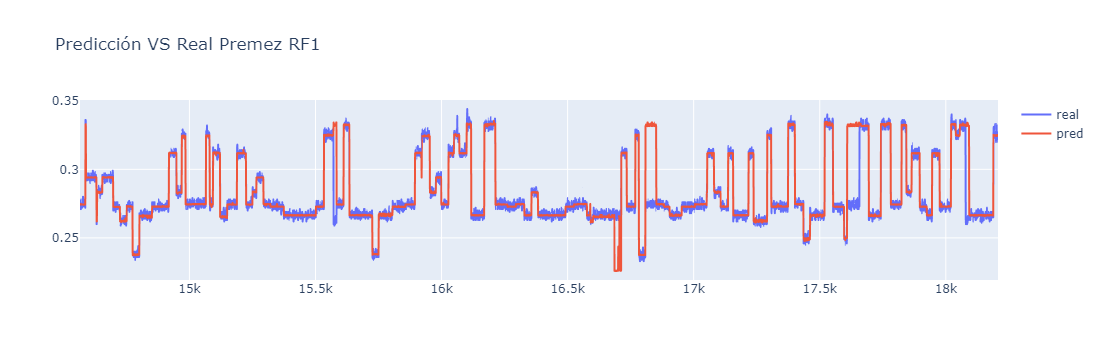

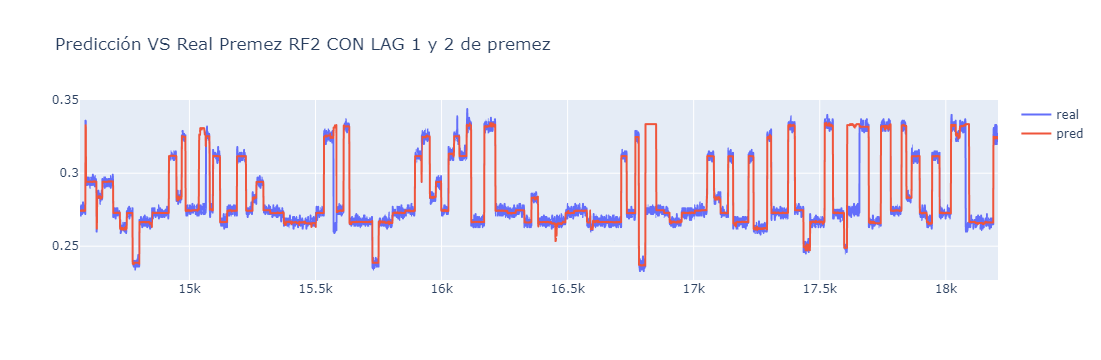

In [127]:
# con diaSemana, PiezaID, tiempoPrepa
rf_premez_lag = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=10, min_samples_split=10, n_jobs=-1)

rf_premez_lag.fit(X_train_lag, y_train_lag)
y_pred_lag = rf_premez_lag.predict(X_test_lag)

# analizamos los residuos
res_test_lag = y_test_lag - y_pred_lag

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test_lag.index, y=y_test1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test_lag.index, y=y_pred_lag, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real Premez RF1')

fig_pred1.show()


# con diaSemana, PiezaID, tiempoPrepa + lag premez
rf_premez_lag_2 = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=10, min_samples_split=10, n_jobs=-1)

rf_premez_lag_2.fit(X_train_lag_2, y_train_lag_2)
y_pred_lag_2 = rf_premez_lag_2.predict(X_test_lag_2)

# analizamos los residuos
res_test_lag_2 = y_test_lag_2 - y_pred_lag_2

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test_lag_2.index, y=y_test1, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test_lag_2.index, y=y_pred_lag_2, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real Premez RF2 CON LAG 1 y 2 de premez')

fig_pred1.show()

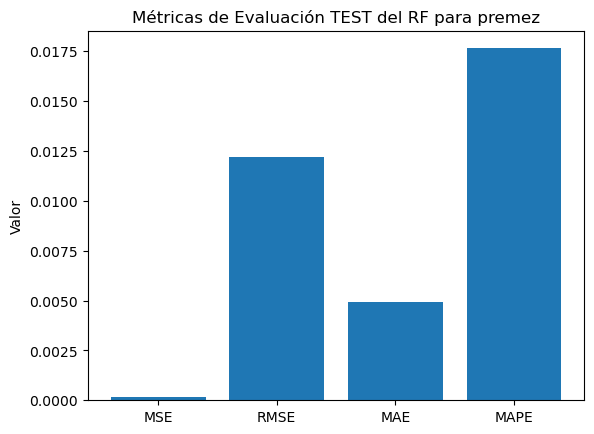

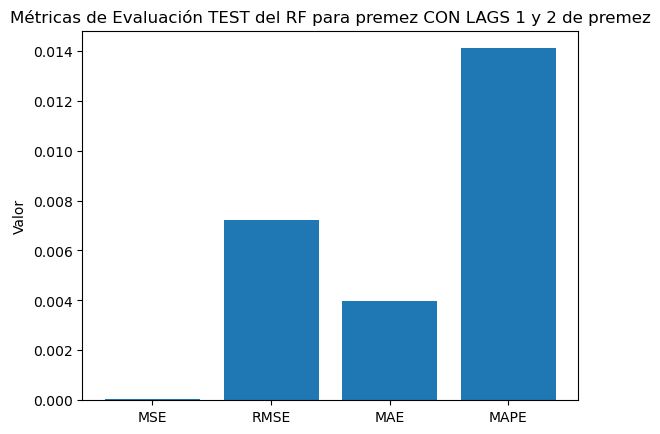

In [112]:
mae_test_lag = mean_absolute_error(y_test_lag, y_pred_lag)
mse_test_lag = mean_squared_error(y_test_lag, y_pred_lag)
rmse_test_lag = np.sqrt(mse_test_lag)
mape_test_lag = np.mean(np.abs(res_test_lag / y_test_lag)[~np.isinf(np.abs(res_test_lag / y_test_lag))])

metricas_test_lag = {'MSE': mse_test_lag, 'RMSE': rmse_test_lag, 'MAE': mae_test_lag, 'MAPE': mape_test_lag}
plt.bar(metricas_test_lag.keys(), metricas_test_lag.values())
plt.title('Métricas de Evaluación TEST del RF para premez')
plt.ylabel('Valor')
plt.show()

mae_test_lag_2 = mean_absolute_error(y_test_lag_2, y_pred_lag_2)
mse_test_lag_2 = mean_squared_error(y_test_lag_2, y_pred_lag_2)
rmse_test_lag_2 = np.sqrt(mse_test_lag_2)
mape_test_lag_2 = np.mean(np.abs(res_test_lag_2 / y_test_lag_2)[~np.isinf(np.abs(res_test_lag_2 / y_test_lag_2))])

metricas_test_lag_2 = {'MSE': mse_test_lag_2, 'RMSE': rmse_test_lag_2, 'MAE': mae_test_lag_2, 'MAPE': mape_test_lag_2}
plt.bar(metricas_test_lag_2.keys(), metricas_test_lag_2.values())
plt.title('Métricas de Evaluación TEST del RF para premez CON LAGS 1 y 2 de premez')
plt.ylabel('Valor')
plt.show()

In [128]:
dump(rf_premez_lag_2, r'C:\Users\a.sarrias\OneDrive - Tafalla Iron Foundry S.COOP\Documentos\modelos\M2_modelo_premez.joblib')


['C:\\Users\\a.sarrias\\OneDrive - Tafalla Iron Foundry S.COOP\\Documentos\\modelos\\M2_modelo_premez.joblib']

# Random Forest CONJUNTO de mezcladoras

In [2]:
archivo= r'C:\Users\a.sarrias\OneDrive - Tafalla Iron Foundry S.COOP\Documentos\datos\hastaMayo.xlsx'

df_conjunto = pd.read_excel(archivo)

In [4]:
col_y = 'premez_norm'

# con lag 1 de compac, cizalla y bentonita y quitando las otras 'irrelevantes'
cols_guardar = ['diaSemana', 'PiezaID', 'tiempoPreparacion', 'premez_norm_lag_1', 'premez_norm_lag_2',
               'finos_norm', 'bentonita_norm', 'tempAgua_norm', 'nMezclador']

X1 = df_conjunto[cols_guardar]
y1 = df_conjunto[col_y]

# Obtener el índice que representa el 80% de los datos
indice_80_percent = int(0.8 * len(df_conjunto))

# Dividir el DataFrame en conjunto de entrenamiento y test
train_data_cj = df_conjunto.iloc[:indice_80_percent, :]
test_data_cj = df_conjunto.iloc[indice_80_percent:, :]

X_train_cj = train_data_cj[cols_guardar]
X_test_cj = test_data_cj[cols_guardar]
y_train_cj = train_data_cj[col_y]
y_test_cj = test_data_cj[col_y]

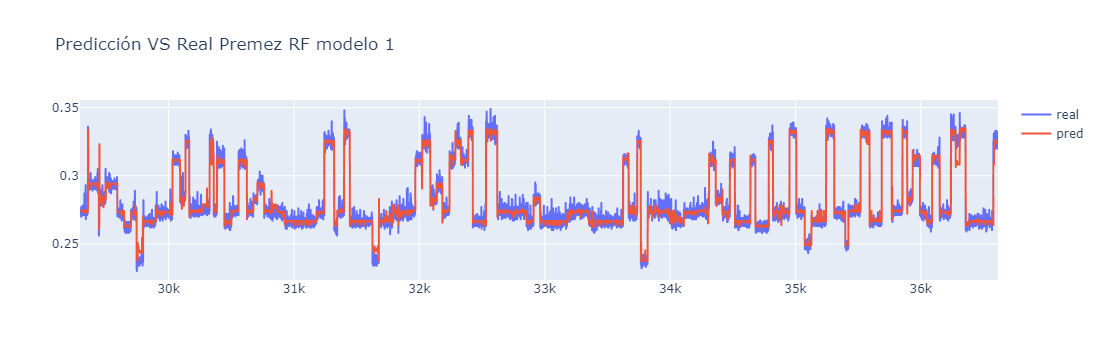

<Axes: >

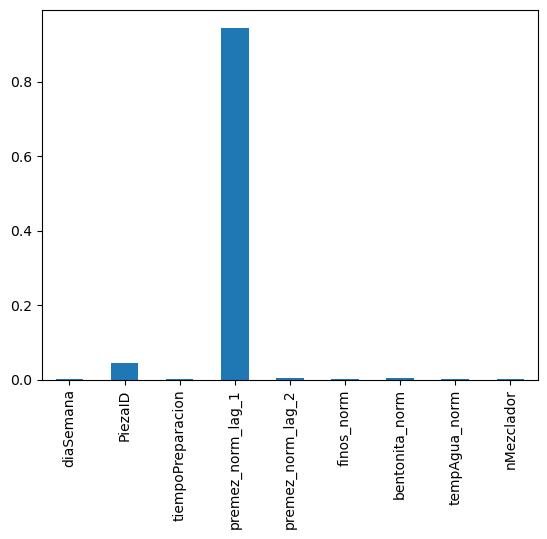

In [20]:
# con diaSemana, PiezaID, tiempoPrepa + lag premez
rf_premez_cj = RandomForestRegressor(
    n_estimators=50, random_state=42, 
    max_depth=10, min_samples_split=10, n_jobs=-1)

rf_premez_cj.fit(X_train_cj, y_train_cj)
y_pred_cj = rf_premez_cj.predict(X_test_cj)

# analizamos los residuos
res_test_cj = y_test_cj - y_pred_cj

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X_test_cj.index, y=y_test_cj, mode='lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X_test_cj.index, y=y_pred_cj, mode='lines', name='pred'))
fig_pred1.update_layout(title='Predicción VS Real Premez RF modelo 1')

fig_pred1.show()

imp_caract_cj = rf_premez_cj.feature_importances_

rf_imp_lag_cj = pd.Series(imp_caract_cj, index=X1.columns)
rf_imp_lag_cj.plot.bar()

In [8]:
dump(rf_premez_cj, r'C:\Users\a.sarrias\OneDrive - Tafalla Iron Foundry S.COOP\Documentos\modelos\modelo_premez_cj.joblib')

['C:\\Users\\a.sarrias\\OneDrive - Tafalla Iron Foundry S.COOP\\Documentos\\modelos\\modelo_premez_cj.joblib']

In [13]:
rf_premez = load(r'C:\Users\a.sarrias\OneDrive - Tafalla Iron Foundry S.COOP\Documentos\modelos\modelo_premez_cj.joblib')
rf_premez2 = load(r'C:\Users\a.sarrias\OneDrive - Tafalla Iron Foundry S.COOP\Documentos\modelos\modelo_premez_rf.joblib')

archivo_mayo = r'C:/Users/a.sarrias/OneDrive - Tafalla Iron Foundry S.COOP/Documentos/datos/pruebaMayo.xlsx'
df_pruebaMayo = pd.read_excel(archivo_mayo)

In [14]:
# modelo 1
col_y = 'premez_norm'
cols_guardar = ['diaSemana', 'PiezaID', 'tiempoPreparacion', 'premez_norm_lag_1', 'premez_norm_lag_2',
               'finos_norm', 'bentonita_norm', 'tempAgua_norm', 'nMezclador']

# como el modelo ya está entrenado, solo hace falta predecir
X1 = df_pruebaMayo[cols_guardar]
y1 = df_pruebaMayo[col_y]

# modelo 2
cols_guardar = ['diaSemana', 'PiezaID', 'tiempoPreparacion', 'premez_norm_lag_1', 'premez_norm_lag_2',
               'finos_norm', 'bentonita_norm', 'tempAgua_norm']

# como el modelo ya está entrenado, solo hace falta predecir
X2 = df_pruebaMayo[cols_guardar]
y2 = df_pruebaMayo[col_y]

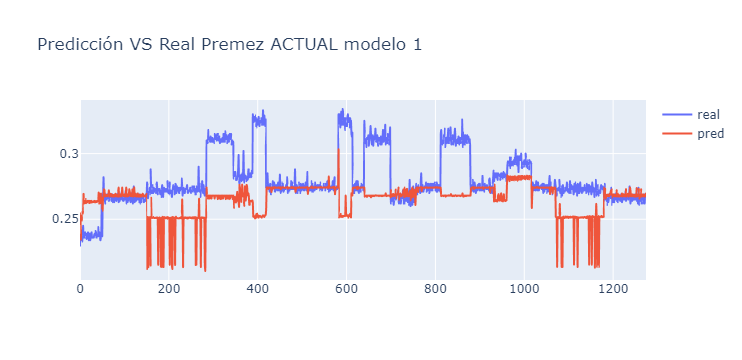

In [18]:
y_pred_actual = rf_premez.predict(X1)

# analizamos los residuos
res_actual = y1 - y_pred_actual

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X1.index, y=y1, mode = 'lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X1.index, y=y_pred_actual, mode = 'lines', name='pred'))
fig_pred1.update_layout(title ='Predicción VS Real Premez ACTUAL modelo 1')

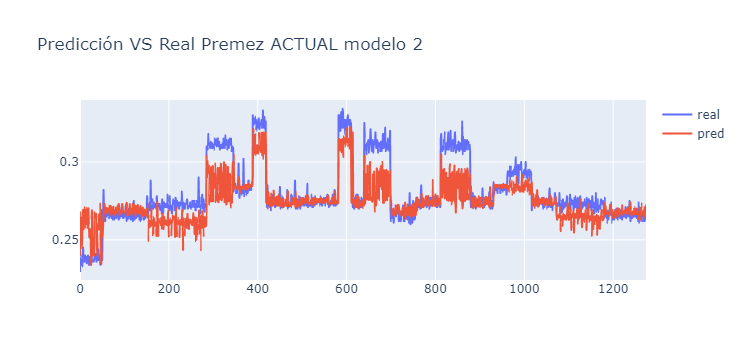

In [19]:
y_pred_actual2 = rf_premez2.predict(X2)

# analizamos los residuos
res_actual2 = y2 - y_pred_actual2

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X2.index, y=y2, mode = 'lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X2.index, y=y_pred_actual2, mode = 'lines', name='pred'))
fig_pred1.update_layout(title ='Predicción VS Real Premez ACTUAL modelo 2')

# PREDICCIÓN DATOS ACTUALES CON EL ÚLTIMO MODELO RF (modelo_premez_rf)

In [33]:
# Especifica la ruta del archivo Excel
archivo_excel_1 = r'C:\Users\a.sarrias\Documents\datos\datos_hasta8abril24_M1.xlsx'
# archivo_excel_2 = r'C:\Users\a.sarrias\Documents\datos\datos_hasta8abril24_M2.xlsx'


# Carga los datos del archivo Excel en un DataFrame
df_hasta8abril_M1 = pd.read_excel(archivo_excel_1)
# df_hasta8abril_M2 = pd.read_excel(archivo_excel_2)

rf_premez = load(r'C:\Users\a.sarrias\Documents\modelos\modelo_premez_rf.joblib')

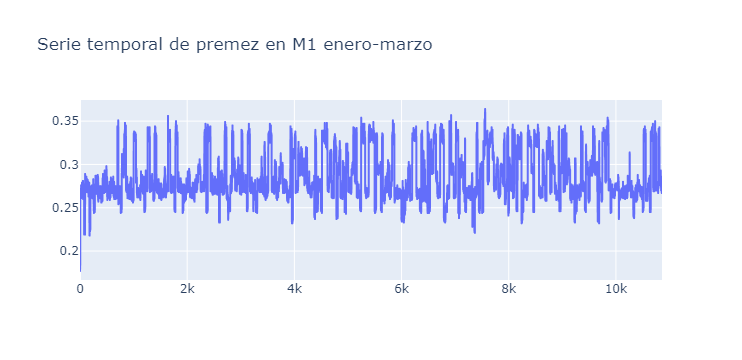

In [35]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=df_hasta8abril_M1.index,y=df_hasta8abril_M1.premez_norm,name='norm'))
fig.update_layout(title='Serie temporal de premez en M1 enero-marzo')

fig.show()

In [36]:
## actualidad con el nuevo modelo Random Forest

# definir la variable objetivo y las características para entrenamiento  y test
col_y = 'premez_norm'
cols_guardar = ['diaSemana', 'PiezaID', 'tiempoPreparacion', 'premez_norm_lag_1', 'premez_norm_lag_2',
               'finos_norm', 'bentonita_norm', 'tempAgua_norm']

# como el modelo ya está entrenado, solo hace falta predecir
X1 = df_hasta8abril_M1[cols_guardar]
y1 = df_hasta8abril_M1[col_y]

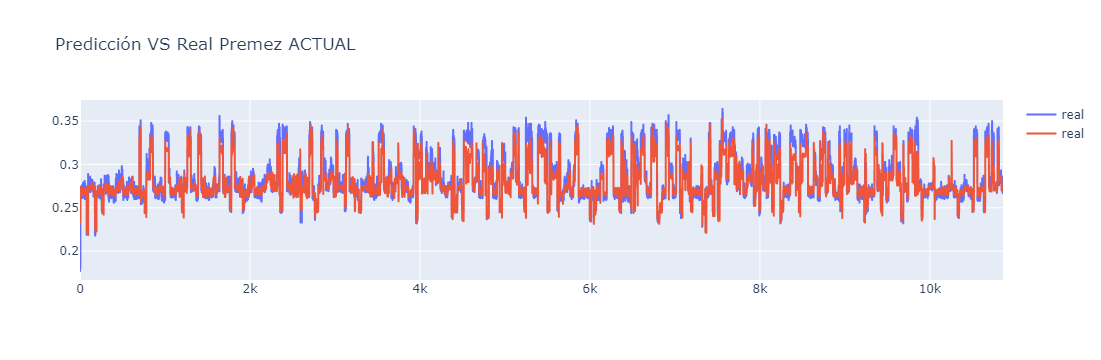

In [37]:
y_pred_actual = rf_premez.predict(X1)

# analizamos los residuos
res_actual = y1 - y_pred_actual

fig_pred1 = go.Figure()
fig_pred1.add_trace(go.Scattergl(x=X1.index, y=y1, mode = 'lines', name='real'))
fig_pred1.add_trace(go.Scattergl(x=X1.index, y=y_pred_actual, mode = 'lines', name='real'))
fig_pred1.update_layout(title ='Predicción VS Real Premez ACTUAL')

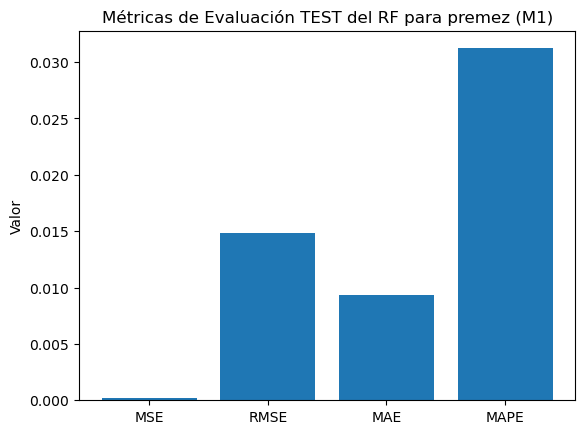

In [39]:
# Evaluación del modelo

mae_test_act = mean_absolute_error(y1, y_pred_actual)
mse_test_act = mean_squared_error(y1, y_pred_actual)
rmse_test_act = np.sqrt(mse_test_act)
mape_test_act = np.mean(np.abs(res_actual/y1)[~np.isinf(np.abs(res_actual/y1))])

metricas_test = {'MSE': mse_test_act, 'RMSE': rmse_test_act, 'MAE': mae_test_act, 'MAPE': mape_test_act}
plt.bar(metricas_test.keys(), metricas_test.values())
plt.title('Métricas de Evaluación TEST del RF para premez (M1)')
plt.ylabel('Valor')
plt.show()